<h1>Data Cleaning</h1>
In this section, we will be cleaning all the rawContents of our tweets in order for us to visualize and analyze our data properly.

<h4>Process</h4>
We will conduct the following process:

* Remove URL's
* Making each text to LowerCase
* Removing stopwords, punctuations and remaining non alphabetical characters
* Lemmatize Text


In [1]:
import pandas as pd

df_tweets_en = pd.read_csv("./data/disaster_tweets_en.csv")
df_tweets_en["rawContent"] = df_tweets_en["rawContent"].astype(str)

In [2]:
df_tweets_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           9500 non-null   object
 1   date          9500 non-null   object
 2   rawContent    9500 non-null   object
 3   sourceLabel   9500 non-null   object
 4   retweetCount  9500 non-null   int64 
 5   location      6926 non-null   object
dtypes: int64(1), object(5)
memory usage: 445.4+ KB


In [3]:
import string
from nltk.corpus import stopwords
from nltk import  word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')
# lemmatizer
lemmatizer = WordNetLemmatizer()
# Stopwords
stop_words = stopwords.words('english')

#add punctuation char's to stopwords list
stop_words += list(string.punctuation) # <-- contains !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

#add integers
stop_words += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


def tokenize_lowercase(text):
    tokens = word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed

def remove_nums(text_object):
    no_nums = list(filter(lambda x: x.isalpha(), text_object))
    return no_nums


def remove_urls(text_object):
    other_urls = ["http", "pm", "am"]
    no_url = list(filter(lambda x: x not in other_urls, text_object))
    return no_url

def lemmatize_text(df_text):
    lemmatized =[]
    for w in df_text:
        lemmatized.append(lemmatizer.lemmatize(w))
    return lemmatized

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jayra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Jayra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
df_tweets_en['rawContent'] = df_tweets_en['rawContent'].apply(tokenize_lowercase)
df_tweets_en['rawContent'] = df_tweets_en['rawContent'].apply(remove_nums)
print(df_tweets_en['rawContent'])
df_tweets_en['rawContent'] = df_tweets_en['rawContent'].apply(lemmatize_text)
df_tweets_en['rawContent'] = df_tweets_en['rawContent'].apply(remove_urls)



0       [mario, tennis, farmer, forest, fire, preventi...
1       [otrebaalex, rwapodcast, nation, rots, within,...
2       [melindiscott, toekneestweets, pennymordaunt, ...
3       [california, cities, ban, new, gas, stations, ...
4       [dilettanterypod, think, western, society, spe...
                              ...                        
9495    [hurricane, center, tropical, cyclone, two, wi...
9496    [hurricane, center, tropical, cyclone, two, gr...
9497    [weatherupdate, rt, potential, tropical, cyclo...
9498    [weatherupdate, rt, ast, june, key, messages, ...
9499    [invest, potential, tropical, cyclone, two, ap...
Name: rawContent, Length: 9500, dtype: object


In [5]:
print(df_tweets_en['rawContent'])

0       [mario, tennis, farmer, forest, fire, preventi...
1       [otrebaalex, rwapodcast, nation, rot, within, ...
2       [melindiscott, toekneestweets, pennymordaunt, ...
3       [california, city, ban, new, gas, station, bat...
4       [dilettanterypod, think, western, society, spe...
                              ...                        
9495    [hurricane, center, tropical, cyclone, two, wi...
9496    [hurricane, center, tropical, cyclone, two, gr...
9497    [weatherupdate, rt, potential, tropical, cyclo...
9498    [weatherupdate, rt, ast, june, key, message, p...
9499    [invest, potential, tropical, cyclone, two, ap...
Name: rawContent, Length: 9500, dtype: object


<h1>Exploratory Data Analysis</h1>
In this section, we will be conducting EDA in order for us to know about the nature of our data and check the relevance of our goal based on our collected data.

<h4>Process</h4>
WE define the process based on the features and goals we would like to extract from the Data. The following visualizations are our goal:

*   Identifying the Words per tweet based on the number of tweets
*   Identifying the usefulness of location if we can configure the tweets based on location.
*   Identfying the mostly used words in the tweets


In [6]:
tweet_lengths = [len(tokens) for tokens in df_tweets_en['rawContent']]
print('Max tweet length is {}'.format(max(tweet_lengths)))

Max tweet length is 55


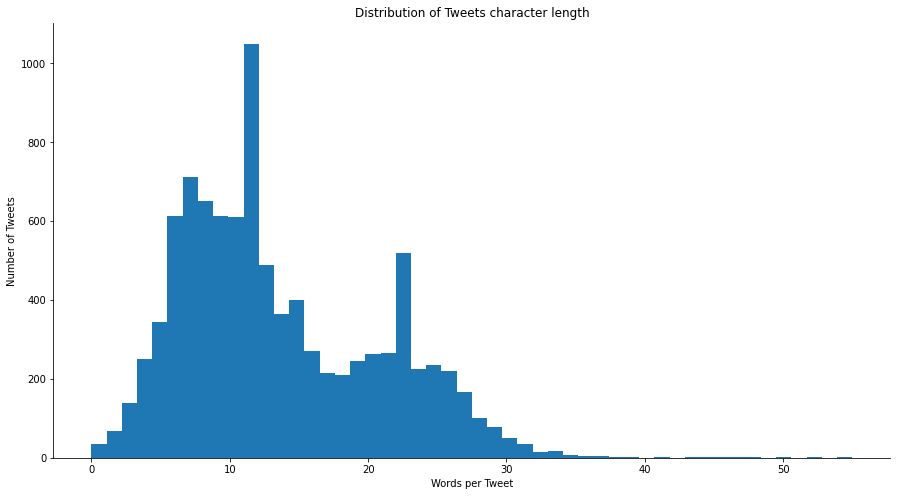

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(15,8))
plt.hist(tweet_lengths, bins = 50)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Words per Tweet')
sns.despine();

In [8]:
import plotly.graph_objects as go
import plotly.express as px
#Distinct location in dataset
dist_location=df_tweets_en['location'].value_counts()
print(len(dist_location))
fig = px.scatter(dist_location, y=dist_location.values, x=dist_location.index,size=dist_location.values)
fig.show()

2975


In [9]:
#Distinct labels in dataset
dist_label=df_tweets_en['sourceLabel'].value_counts()
print(len(dist_label))
fig = px.scatter(dist_label, y=dist_label.values, x=dist_label.index,size=dist_label.values)
fig.show()

321


In [10]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df_tweets_en['rawContent'] for item in sublist]

word_freq = FreqDist(flat_words)
most_common_count = [x[1] for x in word_freq.most_common(100)]
most_common_word = [x[0] for x in word_freq.most_common(100)]

#create dictionary mapping of word count
top_100_dictionary = dict(zip(most_common_word, most_common_count))


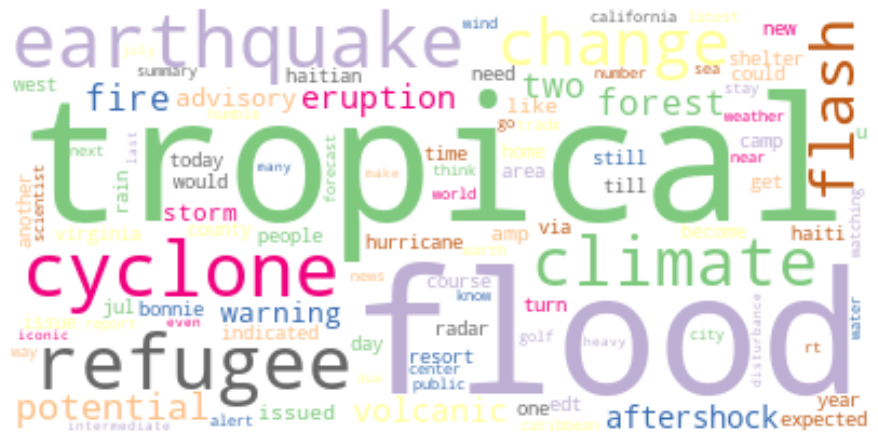

In [11]:
from wordcloud import WordCloud

#Create Word Cloud of top 100 words
wordcloud = WordCloud(colormap = 'Accent', background_color = 'white')\
.generate_from_frequencies(top_100_dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

<h1>Tagalog Corpus (Taglish)</h1>
In this section, we will be cleaning all the rawContents of our tweets in our taglish corpus in order for us to visualize and analyze our data properly.

<h4>Process</h4>
We will conduct the following process:

* Remove URL's
* Making each text to LowerCase
* Removing stopwords, punctuations and remaining non alphabetical characters (modified)
* Attempt to Lemmatize Text

In [12]:
import pandas as pd

df_tweets_tl = pd.read_csv("./data/disaster_tweets_tl.csv")
df_tweets_tl["rawContent"] = df_tweets_tl["rawContent"].astype(str)

In [13]:
df_tweets_tl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           457 non-null    object
 1   date          457 non-null    object
 2   rawContent    457 non-null    object
 3   sourceLabel   457 non-null    object
 4   retweetCount  457 non-null    int64 
 5   location      336 non-null    object
dtypes: int64(1), object(5)
memory usage: 21.5+ KB


In [1]:
import string
from nltk.corpus import stopwords
from nltk import  word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')
# lemmatizer
lemmatizer = WordNetLemmatizer()
# Stopwords
stop_words = stopwords.words('english')

#add punctuation char's to stopwords list
stop_words += list(string.punctuation) # <-- contains !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

#add integers
stop_words += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
stop_words += ["dito", "rito", "sapagkat", "ngunit", "sa" "si", "sya", "ngayon", "kaso", 
                "kasi", "dahil", "nang", "ng",  "ung","na", "ang", "mga", "ka", "pa","ni", 
                "ano", "nya", "yan", "iyan","ayan", "san", "sa", "haha", "rt", "gt", "may", 
                "ay", "may", "si", "siya", "maging", "yung", "amp","pri", "pre", "korique",
                "saan", "nariyan", "yon", "yaan", "don", "ron", "kaso", "kasi", "lang", "yan"]

def tokenize_lowercase(text):
    tokens = word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed

def remove_nums(text_object):
    no_nums = list(filter(lambda x: x.isalpha(), text_object))
    return no_nums


def remove_urls(text_object):
    other_urls = ["http", "pm", "am"]
    no_url = list(filter(lambda x: x not in other_urls, text_object))
    return no_url

def lemmatize_text(df_text):
    lemmatized =[]
    for w in df_text:
        lemmatized.append(lemmatizer.lemmatize(w))
    return lemmatized

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jayra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Jayra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [15]:
df_tweets_tl['rawContent'] = df_tweets_tl['rawContent'].apply(tokenize_lowercase)
df_tweets_tl['rawContent'] = df_tweets_tl['rawContent'].apply(remove_nums)
print(df_tweets_tl['rawContent'])
df_tweets_tl['rawContent'] = df_tweets_tl['rawContent'].apply(lemmatize_text)
df_tweets_tl['rawContent'] = df_tweets_tl['rawContent'].apply(remove_urls)

0      [ministry, climate, change, philippines, depar...
1      [ministry, climate, change, philippines, depar...
2      [philippines, worsening, typhoons, offers, les...
3      [kahapon, nag, kami, sabi, nong, isa, kong, ka...
4      [countries, climate, change, philippines, end,...
                             ...                        
452    [ate, lota, sa, north, especially, sa, dumaget...
453    [kaya, nalang, ang, aftershock, dyan, prayforj...
454    [good, luck, eh, may, lindol, aftershock, pa, ...
455    [nursenko, nope, manila, time, pero, sa, japan...
456    [nursenko, nope, manila, time, pero, sa, japan...
Name: rawContent, Length: 457, dtype: object


In [16]:
print(df_tweets_tl['rawContent'])

0      [ministry, climate, change, philippine, depart...
1      [ministry, climate, change, philippine, depart...
2      [philippine, worsening, typhoon, offer, lesson...
3      [kahapon, nag, kami, sabi, nong, isa, kong, ka...
4      [country, climate, change, philippine, end, wo...
                             ...                        
452    [ate, lota, sa, north, especially, sa, dumaget...
453    [kaya, nalang, ang, aftershock, dyan, prayforj...
454    [good, luck, eh, may, lindol, aftershock, pa, ...
455    [nursenko, nope, manila, time, pero, sa, japan...
456    [nursenko, nope, manila, time, pero, sa, japan...
Name: rawContent, Length: 457, dtype: object


<h1>Taglish EDA</h1>
<h4>Process</h4>
We define the process based on the features and goals we would like to extract from the Data. The following visualizations are our goal:

*   Identifying the Words per tweet based on the number of tweets
*   Identifying the usefulness of location if we can configure the tweets based on location.
*   Identifying the label source to check where the tweet source is and why the location has that behaviour
*   Identfying the mostly used words in the tweets


In [17]:
tweet_lengths = [len(tokens) for tokens in df_tweets_tl['rawContent']]
print('Max tweet length is {}'.format(max(tweet_lengths)))

Max tweet length is 37


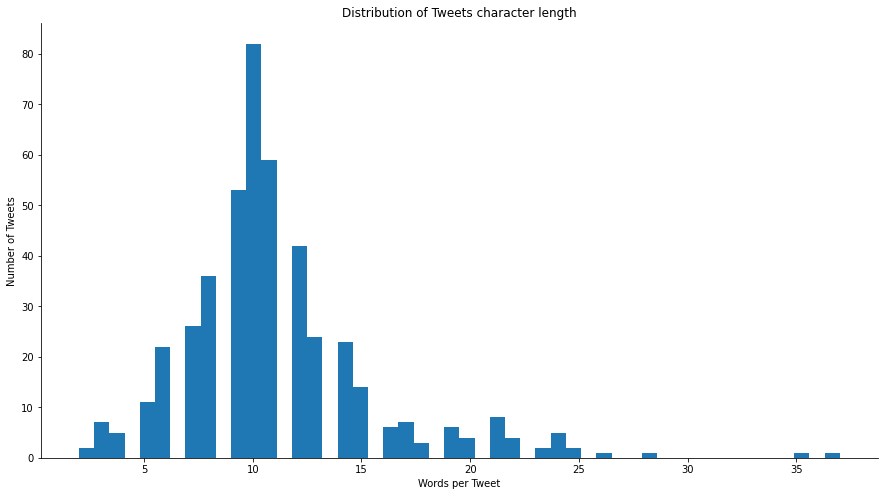

In [18]:
# Number of words per tweet  in dataset

plt.figure(figsize=(15,8))
plt.hist(tweet_lengths, bins = 50)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Words per Tweet')
sns.despine();

In [19]:

# Distinct location in dataset
dist_location=df_tweets_tl['location'].value_counts()
print(len(dist_location))
fig = px.scatter(dist_location, y=dist_location.values, x=dist_location.index,size=dist_location.values)
fig.show()

200


In [20]:
#Distinct labels in dataset
dist_label=df_tweets_tl['sourceLabel'].value_counts()
print(len(dist_label))
fig = px.scatter(dist_label, y=dist_label.values, x=dist_label.index,size=dist_label.values)
fig.show()

51


In [21]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df_tweets_tl['rawContent'] for item in sublist]

word_freq = FreqDist(flat_words)
most_common_count = [x[1] for x in word_freq.most_common(100)]
most_common_word = [x[0] for x in word_freq.most_common(100)]

#create dictionary mapping of word count
top_100_dictionary = dict(zip(most_common_word, most_common_count))


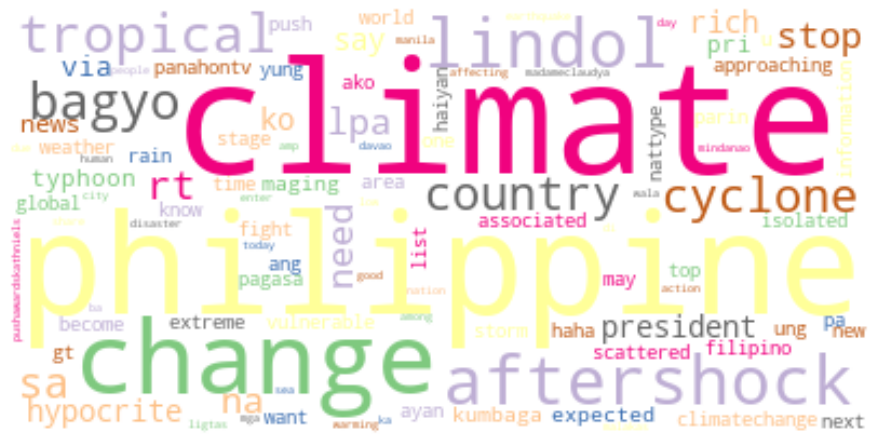

In [22]:
#Create Word Cloud of top 100 words
wordcloud = WordCloud(colormap = 'Accent', background_color = 'white')\
.generate_from_frequencies(top_100_dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()